# Decipher Single-byte XOR using ETAOIN SHRDLU

https://www.insider.com/gchq-reveals-last-nazi-message-wwii-2020-5

![final-message](https://i.insider.com/5eb52a95fc593d494f70c193?width=500&format=jpeg&auto=webp)

In [1]:
import random
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plain_text = b'british troops entered cuxhaven at 1400 on 6 may - from now on all radio traffic will cease - wishing you all the best. lt kunkel.'

In [3]:
key = random.randint(0, 255)

In [4]:
def encrypt_single_xor(text: bytes, key: int) -> bytes:
    return bytes([b ^ key for b in text])

In [5]:
cipher_text = encrypt_single_xor(plain_text, key)

Now we need to find `key` and `plain_text` given this `cipher_text`

In [6]:
def decipher_single_xor(text: bytes, key: int) -> bytes:
    return bytes([b ^ key for b in text])

In [7]:
def scoring_fn_sum(text: bytes):
    freqs = {
        'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253,
        'e': 0.12702, 'f': 0.02228, 'g': 0.02015, 'h': 0.06094,
        'i': 0.06094, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025,
        'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929,
        'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056,
        'u': 0.02758, 'v': 0.00978, 'w': 0.02360, 'x': 0.00150,
        'y': 0.01974, 'z': 0.00074, ' ': 0.13000
    }
    return sum([freqs.get(chr(byte), 0) for byte in text])

In [8]:
def decipher(text: bytes, scoring_fn=lambda x: 1):
    plains = []
    for _key in range(key-3, min(key + 3, 256)):
        _plain_text = decipher_single_xor(cipher_text, _key)
        _score = scoring_fn(_plain_text)
        plains.append((_plain_text, _key, _score))
    return sorted(plains, key=lambda x: x[2], reverse=True)

In [9]:
def plot_linears(x1, y1, x2, y2):
    plt.plot(x1, y1)
    plt.plot(x2, y2)
    plt.show()

In [10]:
def scoring_fn_maxfit(text: bytes):
    freqs = {
        'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253,
        'e': 0.12702, 'f': 0.02228, 'g': 0.02015, 'h': 0.06094,
        'i': 0.06094, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025,
        'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929,
        'q': 0.00095, 'r': 0.05987, 's': 0.06327, 't': 0.09056,
        'u': 0.02758, 'v': 0.00978, 'w': 0.02360, 'x': 0.00150,
        'y': 0.01974, 'z': 0.00074, ' ': 0.13000
    }
    counter = Counter(text)
    x, y = list(freqs.keys()), [(counter.get(ord(k), 0) * 100)/len(text) for k in freqs]
    plot_linears(x, y, x, [(v * 100)/sum(freqs.values()) for v in freqs.values()])
    return sum([freqs.get(chr(byte), 0) for byte in text])

In [11]:
plains = decipher(cipher_text, scoring_fn=scoring_fn_sum)

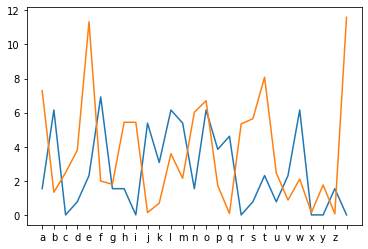

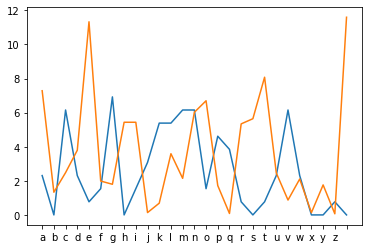

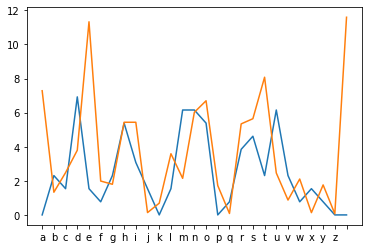

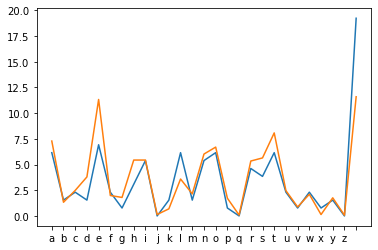

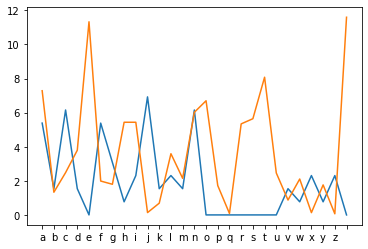

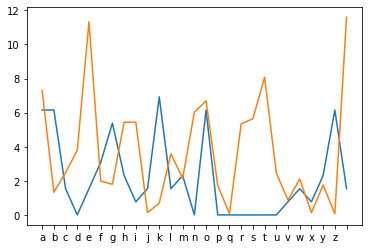

In [12]:
plains = decipher(cipher_text, scoring_fn=scoring_fn_maxfit)